In [1]:
import torch
from pathlib import Path
from omegaconf import OmegaConf
from tqdm.notebook import tqdm
from sgm.util import instantiate_from_config
import json
import matplotlib.pyplot as plt
from torch.utils.data import default_collate

In [2]:
configs = list(Path("logs/2025-02-28T14-19-35_x2ct-ct-sv3d-diffusion-ct-cached-128/configs").glob("*.yaml"))

In [3]:
configs = [OmegaConf.load(c) for c in configs]
config = OmegaConf.merge(*configs)

In [4]:
chkpt_path = "/data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze/generative-models/logs/2025-02-28T14-19-35_x2ct-ct-sv3d-diffusion-ct-cached-128/checkpoints/epoch=000601.ckpt"
assert Path(chkpt_path).exists(), f"Checkpoint {chkpt_path} does not exist"
assert Path(chkpt_path).is_file(), f"Checkpoint {chkpt_path} is not a file"

In [5]:
config.model.params.first_stage_config.params.ckpt_engine = config.model.params.first_stage_config.params.ckpt_engine.replace("/raid/maximilian.schulze", "/data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze")

In [6]:
config.model.params.conditioner_config.params.emb_models[1].params.encoder_config.params.ckpt_engine = config.model.params.conditioner_config.params.emb_models[1].params.encoder_config.params.ckpt_engine.replace("/raid/maximilian.schulze", "/data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze")

In [7]:
config.model.params.ckpt_path = chkpt_path

In [8]:
model = instantiate_from_config(config.model)

Restoring diffusion from /data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze/generative-models/logs/2025-02-28T14-19-35_x2ct-ct-sv3d-diffusion-ct-cached-128/checkpoints/epoch=000601.ckpt
VideoTransformerBlock is using checkpointing


INFO:sgm.modules.diffusionmodules.openaimodel:Building a Downsample layer with 2 dims.
INFO:sgm.modules.diffusionmodules.openaimodel:  --> settings are: 
 in-chn: 320, out-chn: 320, kernel-size: 3, stride: 2, padding: 1


VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing


INFO:sgm.modules.diffusionmodules.openaimodel:Building a Downsample layer with 2 dims.
INFO:sgm.modules.diffusionmodules.openaimodel:  --> settings are: 
 in-chn: 640, out-chn: 640, kernel-size: 3, stride: 2, padding: 1


VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing


INFO:sgm.modules.diffusionmodules.openaimodel:Building a Downsample layer with 2 dims.
INFO:sgm.modules.diffusionmodules.openaimodel:  --> settings are: 
 in-chn: 1280, out-chn: 1280, kernel-size: 3, stride: 2, padding: 1


VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing
VideoTransformerBlock is using checkpointing


INFO:root:Loaded hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224 model config.
INFO:root:Loading pretrained hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224 weights (/home/maximilian.schulze/.cache/huggingface/hub/models--microsoft--BiomedCLIP-PubMedBERT_256-vit_base_patch16_224/snapshots/9f341de24bfb00180f1b847274256e9b65a3a32e/open_clip_pytorch_model.bin).
INFO:sgm.modules.diffusionmodules.model:making attention of type 'vanilla-xformers' with 512 in_channels
INFO:sgm.modules.diffusionmodules.model:building MemoryEfficientAttnBlock with 512 in_channels...


Initialized embedder #0: FrozenOpenCLIPImagePredictionEmbedderXrays with 195902721 params. Trainable: False


INFO:sgm.modules.diffusionmodules.model:Working with z of shape (1, 8, 16, 16) = 2048 dimensions.
INFO:sgm.modules.diffusionmodules.model:making attention of type 'vanilla-xformers' with 512 in_channels
INFO:sgm.modules.diffusionmodules.model:building MemoryEfficientAttnBlock with 512 in_channels...


Restored from /data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze/generative-models/logs/2025-02-24T17-19-59_x2ct-xray-imagenet-kl_f8_8chn-xray-128/checkpoints/epoch=000502.ckpt with 0 missing and 56 unexpected keys
Unexpected Keys: ['loss.logvar', 'loss.perceptual_loss.scaling_layer.shift', 'loss.perceptual_loss.scaling_layer.scale', 'loss.perceptual_loss.net.slice1.0.weight', 'loss.perceptual_loss.net.slice1.0.bias', 'loss.perceptual_loss.net.slice1.2.weight', 'loss.perceptual_loss.net.slice1.2.bias', 'loss.perceptual_loss.net.slice2.5.weight', 'loss.perceptual_loss.net.slice2.5.bias', 'loss.perceptual_loss.net.slice2.7.weight', 'loss.perceptual_loss.net.slice2.7.bias', 'loss.perceptual_loss.net.slice3.10.weight', 'loss.perceptual_loss.net.slice3.10.bias', 'loss.perceptual_loss.net.slice3.12.weight', 'loss.perceptual_loss.net.slice3.12.bias', 'loss.perceptual_loss.net.slice3.14.weight', 'loss.perceptual_loss.net.slice3.14.bias', 'loss.perceptual_loss.net.slice4.17.weight',

INFO:sgm.modules.diffusionmodules.model:making attention of type 'vanilla-xformers' with 512 in_channels
INFO:sgm.modules.diffusionmodules.model:building MemoryEfficientAttnBlock with 512 in_channels...
INFO:sgm.modules.diffusionmodules.model:Working with z of shape (1, 8, 16, 16) = 2048 dimensions.
INFO:sgm.modules.diffusionmodules.model:making attention of type 'vanilla-xformers' with 512 in_channels
INFO:sgm.modules.diffusionmodules.model:building MemoryEfficientAttnBlock with 512 in_channels...


Restored from /data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze/generative-models/logs/2025-02-24T17-42-07_x2ct-ct-imagenet-kl_f8_8chn-ct-stacked128/checkpoints/epoch=000005-v1.ckpt with 0 missing and 56 unexpected keys
Unexpected Keys: ['loss.logvar', 'loss.perceptual_loss.scaling_layer.shift', 'loss.perceptual_loss.scaling_layer.scale', 'loss.perceptual_loss.net.slice1.0.weight', 'loss.perceptual_loss.net.slice1.0.bias', 'loss.perceptual_loss.net.slice1.2.weight', 'loss.perceptual_loss.net.slice1.2.bias', 'loss.perceptual_loss.net.slice2.5.weight', 'loss.perceptual_loss.net.slice2.5.bias', 'loss.perceptual_loss.net.slice2.7.weight', 'loss.perceptual_loss.net.slice2.7.bias', 'loss.perceptual_loss.net.slice3.10.weight', 'loss.perceptual_loss.net.slice3.10.bias', 'loss.perceptual_loss.net.slice3.12.weight', 'loss.perceptual_loss.net.slice3.12.bias', 'loss.perceptual_loss.net.slice3.14.weight', 'loss.perceptual_loss.net.slice3.14.bias', 'loss.perceptual_loss.net.slice4.17.we

In [9]:
model.sampler.discretization(50)

tensor([7.0000e+02, 6.2033e+02, 5.4856e+02, 4.8403e+02, 4.2611e+02, 3.7425e+02,
        3.2789e+02, 2.8654e+02, 2.4974e+02, 2.1707e+02, 1.8814e+02, 1.6258e+02,
        1.4005e+02, 1.2025e+02, 1.0290e+02, 8.7746e+01, 7.4545e+01, 6.3083e+01,
        5.3167e+01, 4.4618e+01, 3.7275e+01, 3.0994e+01, 2.5642e+01, 2.1103e+01,
        1.7271e+01, 1.4051e+01, 1.1361e+01, 9.1241e+00, 7.2762e+00, 5.7588e+00,
        4.5211e+00, 3.5189e+00, 2.7134e+00, 2.0714e+00, 1.5643e+00, 1.1676e+00,
        8.6040e-01, 6.2527e-01, 4.4752e-01, 3.1497e-01, 2.1760e-01, 1.4726e-01,
        9.7388e-02, 6.2754e-02, 3.9263e-02, 2.3752e-02, 1.3820e-02, 7.6843e-03,
        4.0490e-03, 2.0000e-03, 0.0000e+00])

In [9]:
json.dumps(OmegaConf.to_container(config.data))

'{"target": "sgm.data.radchest.RadchestCTVideo128Dataloader", "params": {"num_slices": 128, "train": {"loader": {"batch_size": 16, "num_workers": 32, "shuffle": true}, "dataset": {"target": "sgm.data.radchest.CachedXCT_H5_dataset", "params": {"cache_dir": "/raid/maximilian.schulze/dataset_cache", "optimize_zip": true, "h5_dataset_path": "/raid/shared/x2ct/radchest/h5/sitk-dataset.h5", "h5_ct_group_path": "512/ct", "h5_xray_group_path": "512/drr", "h5_text_dataset_path": "/raid/shared/x2ct/radchest/discription-latents-h5/short-template.h5", "h5_text_group_path": "BiomedCLIPTextEmbedder/V2/OneNonNegativeTokens", "split_file": "/raid/shared/x2ct/radchest/train_val_split.json", "train": true, "scale": 256, "scale_images": true, "crop_size": 256, "use_f16": false, "ct_only": false, "xray_only": false, "load_text": true, "num_projections": 2, "is_preprocessed": false}}}, "validation": {"loader": {"batch_size": 16, "num_workers": 32, "shuffle": false}, "dataset": {"target": "sgm.data.radchest

In [10]:
data_config = json.loads(
    json.dumps(OmegaConf.to_container(config.data)).replace("/raid/maximilian.schulze/dataset_cache", "/home/maximilian.schulze/dataset_cache").replace("/raid/shared/x2ct/radchest", "/data/shared/x2ct/backup-radchest-dataset/radchest").replace("/raid/maximilian.schulze", "/data/shared/x2ct/backup-maximilian.schulze/maximilian.schulze")
)

In [11]:
data = instantiate_from_config(OmegaConf.create(data_config))

In [12]:
data.setup("")

INFO:root:Loading text data from /data/shared/x2ct/backup-radchest-dataset/radchest/discription-latents-h5/short-template.h5. Using group at BiomedCLIPTextEmbedder/V2/OneNonNegativeTokens
INFO:root:Cropping CT scans to 256x256x256
INFO:root:Resizing CT scans to 256x256x256


Preparing datasets


INFO:root:Loading text data from /data/shared/x2ct/backup-radchest-dataset/radchest/discription-latents-h5/short-template.h5. Using group at BiomedCLIPTextEmbedder/V2/OneNonNegativeTokens
INFO:root:Cropping CT scans to 256x256x256
INFO:root:Resizing CT scans to 256x256x256


In [14]:
test_element = data.validation_dataset[0]

In [13]:
from torch.utils.data import default_collate

In [16]:
batch_element = default_collate([test_element])

In [16]:
# sigmas = model.loss_fn.sigma_sampler.idx_to_sigma(torch.arange(999) + 1)

In [25]:
model = model.to("cuda")
model.eval()

DiffusionEngine(
  (model): OpenAIVideoWrapper(
    (diffusion_model): VideoUNet(
      (time_embed): Sequential(
        (0): Linear(in_features=320, out_features=1280, bias=True)
        (1): SiLU()
        (2): Linear(in_features=1280, out_features=1280, bias=True)
      )
      (label_emb): Sequential(
        (0): Sequential(
          (0): Linear(in_features=256, out_features=1280, bias=True)
          (1): SiLU()
          (2): Linear(in_features=1280, out_features=1280, bias=True)
        )
      )
      (input_blocks): ModuleList(
        (0): TimestepEmbedSequential(
          (0): Conv2d(24, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1-2): 2 x TimestepEmbedSequential(
          (0): VideoResBlock(
            (in_layers): Sequential(
              (0): GroupNorm32(32, 320, eps=1e-05, affine=True)
              (1): SiLU()
              (2): Conv2d(320, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            )
            (h_upd): I

In [26]:
for key in list(batch_element.keys()):
    if isinstance(batch_element[key], torch.Tensor):
        batch_element[key] = batch_element[key].to(model.device)

In [27]:
x = model.get_input(batch_element)
x = model.encode_first_stage(x)
cond = model.conditioner(batch_element)
 

In [20]:
print("Crossattn shape", cond["crossattn"].shape)
print("Concat shape", cond["concat"].shape)
print("Latent shape", x.shape)

Crossattn shape torch.Size([1, 2, 512])
Concat shape torch.Size([1, 16, 16, 16])
Latent shape torch.Size([128, 8, 16, 16])


In [31]:
losses = []
ts = []
model_outputs = []
targets = []
l2s = []
weights = []
with torch.no_grad():
    for t in tqdm(range(1, 1000)):
        t  = torch.tensor([t])
        cond_copy = { k: v.clone() for k, v in cond.items() }
        batch_element_copy = { k: v.clone() if isinstance(v, torch.Tensor) else v for k, v in batch_element.items() }
        loss, target, model_output, loss_weight = model.loss_fn.forward_t(model.model, model.denoiser, cond_copy, x.clone(), batch_element, t)
        ts.append(t.item())
        losses.append(loss.mean().item())
        l2s.append((model_output - target).pow(2).mean().item())
        targets.append(target)
        model_outputs.append(model_output)
        weights.append(loss_weight.mean().item())


  0%|          | 0/999 [00:00<?, ?it/s]

/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


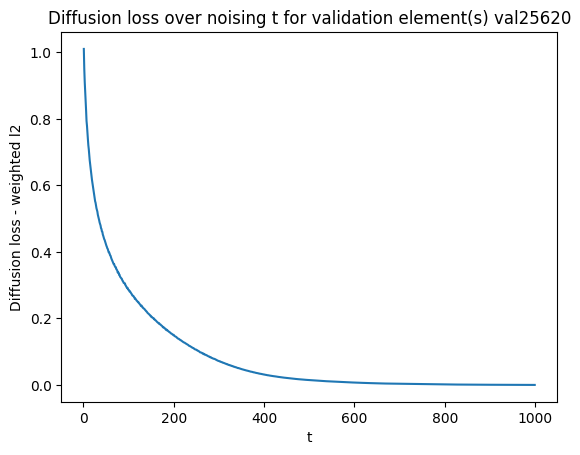

In [34]:
plt.plot(ts, losses)
plt.xlabel("t")
plt.title(f"Diffusion loss over noising t for validation element(s) {str(batch_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')}")
plt.ylabel(f"Diffusion loss - weighted {model.loss_fn.loss_type}")
plt.show()

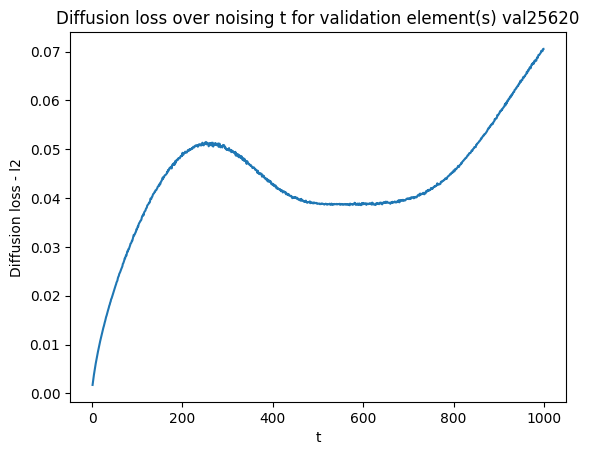

In [35]:
import matplotlib.pyplot as plt
plt.plot(ts, l2s)
plt.xlabel("t")
plt.title(f"Diffusion loss over noising t for validation element(s) {str(batch_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')}")
plt.ylabel(f"Diffusion loss - {model.loss_fn.loss_type}")
plt.show()

In [36]:
sigmas = model.loss_fn.sigma_sampler.idx_to_sigma(torch.tensor(ts))

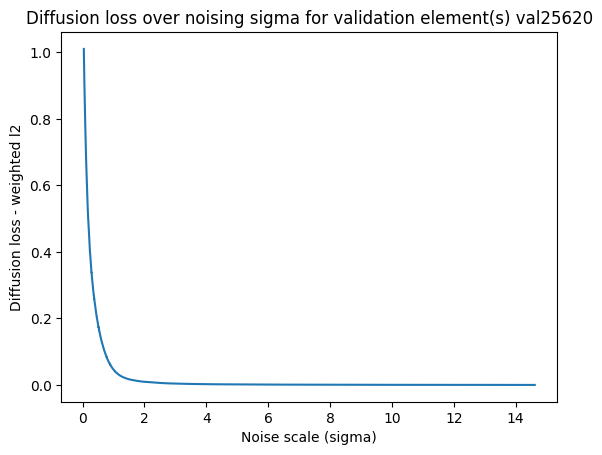

In [37]:
plt.plot(sigmas, losses)
plt.xlabel("Noise scale (sigma)")
plt.ylabel(f"Diffusion loss - weighted {model.loss_fn.loss_type}")
plt.title(f"Diffusion loss over noising sigma for validation element(s) {str(batch_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')}")
plt.show()

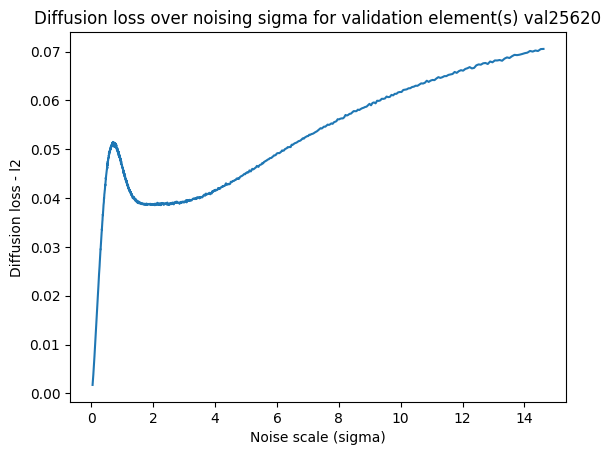

In [38]:
plt.plot(sigmas, l2s)
plt.xlabel("Noise scale (sigma)")
plt.ylabel(f"Diffusion loss - {model.loss_fn.loss_type}")
plt.title(f"Diffusion loss over noising sigma for validation element(s) {str(batch_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')}")
plt.show()

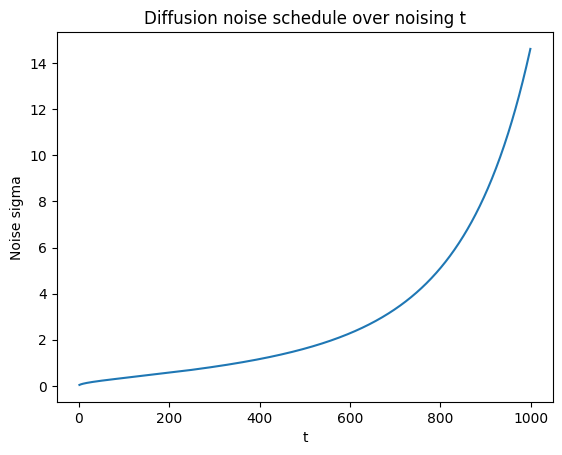

In [39]:
plt.plot(ts, sigmas)
plt.xlabel("t")
plt.ylabel("Noise sigma")
plt.title("Diffusion noise schedule over noising t")
plt.show()

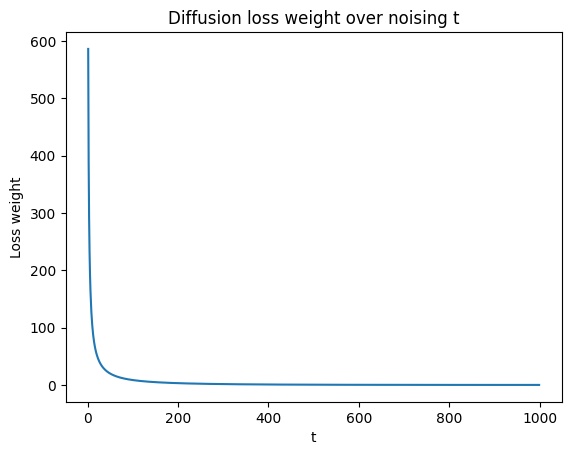

In [40]:
plt.plot(ts, weights)
plt.xlabel("t")
plt.ylabel("Loss weight")
plt.title("Diffusion loss weight over noising t")
plt.show()


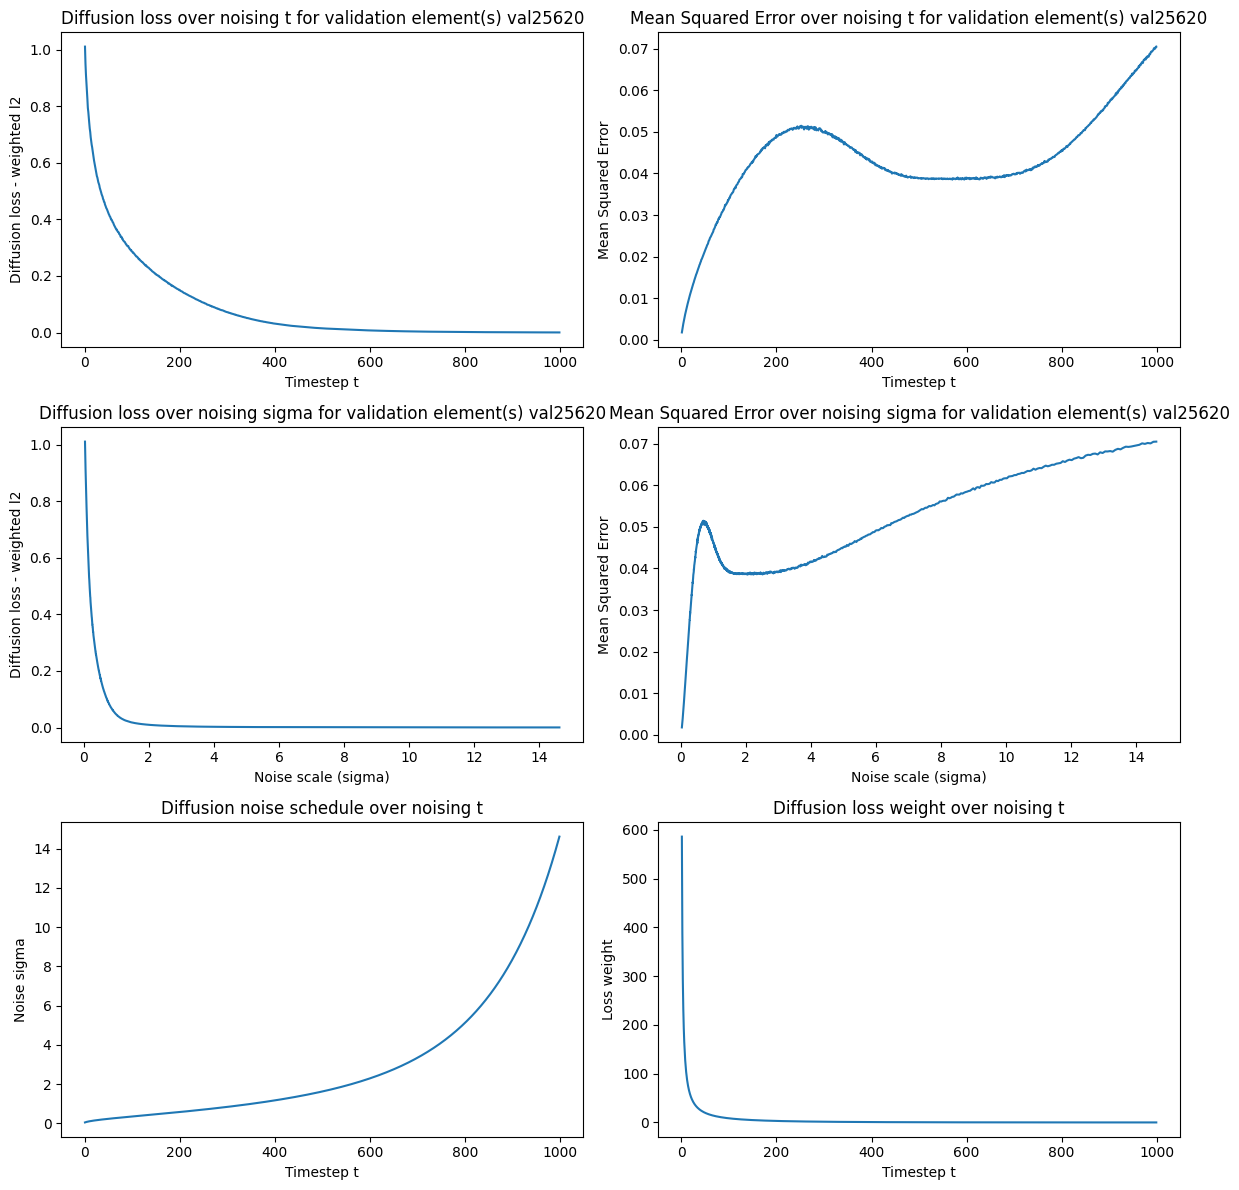

In [47]:
# All the plots above in sub-plots and a single figure
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
element_names = str(batch_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')
axs[0, 0].plot(ts, losses)
axs[0, 0].set_xlabel("Timestep t")
axs[0, 0].set_ylabel(f"Diffusion loss - weighted {model.loss_fn.loss_type}")
axs[0, 0].set_title(f"Diffusion loss over noising t for validation element(s) {element_names}")

axs[0, 1].plot(ts, l2s)
axs[0, 1].set_xlabel("Timestep t")
axs[0, 1].set_ylabel(f"Mean Squared Error")
axs[0, 1].set_title(f"Mean Squared Error over noising t for validation element(s) {element_names}")

axs[1, 0].plot(sigmas, losses)
axs[1, 0].set_xlabel("Noise scale (sigma)")
axs[1, 0].set_ylabel(f"Diffusion loss - weighted {model.loss_fn.loss_type}")
axs[1, 0].set_title(f"Diffusion loss over noising sigma for validation element(s) {element_names}")

axs[1, 1].plot(sigmas, l2s)
axs[1, 1].set_xlabel("Noise scale (sigma)")
axs[1, 1].set_ylabel(f"Mean Squared Error")
axs[1, 1].set_title(f"Mean Squared Error over noising sigma for validation element(s) {element_names}")

axs[2, 0].plot(ts, sigmas)
axs[2, 0].set_xlabel("Timestep t")
axs[2, 0].set_ylabel("Noise sigma")
axs[2, 0].set_title("Diffusion noise schedule over noising t")

axs[2, 1].plot(ts, weights)
axs[2, 1].set_xlabel("Timestep t")
axs[2, 1].set_ylabel("Loss weight")
axs[2, 1].set_title("Diffusion loss weight over noising t")
plt.tight_layout()
plt.show()


In [59]:
# first_model_output = model_outputs[0]
# first_target = targets[0]
# model.decode_first_stage(first_model_output)[64]
# plt.imshow(model.decode_first_stage(first_model_output)[64, 0].cpu().numpy(), cmap="gray")
# plt.title(f"Model output at t={ts[0]} (sigma={sigmas[0]})")
# plt.show()
# plt.imshow(model.decode_first_stage(first_target)[64, 0].cpu().numpy(), cmap="gray")
# plt.title(f"Target at t={ts[0]} (sigma={sigmas[0]:.5f})")
# plt.show()
from PIL import Image
import io
import numpy as np
images = []

for i in tqdm(range(len(ts))):
    with io.BytesIO() as output:
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].imshow(model.decode_first_stage(targets[i])[64, 0].cpu().numpy(), cmap="gray")
        axs[0].set_title(f"Target at t={ts[i]} (sigma={sigmas[i]:.5f})")
        axs[1].imshow(model.decode_first_stage(model_outputs[i])[64, 0].cpu().numpy(), cmap="gray")
        axs[1].set_title(f"Model output at t={ts[i]} (sigma={sigmas[i]:.5f})")
        plt.tight_layout()
        plt.savefig(output)
        plt.close()
        output.seek(0)
        im = Image.open(output)
        images.append(np.array(im))

  0%|          | 0/999 [00:00<?, ?it/s]

In [60]:
# To gif
images_pil = [Image.fromarray(image) for image in images]
images_pil[0].save(f"diffusion_loss_{element_names}.gif", save_all=True, append_images=images_pil[1:], duration=100, loop=0)

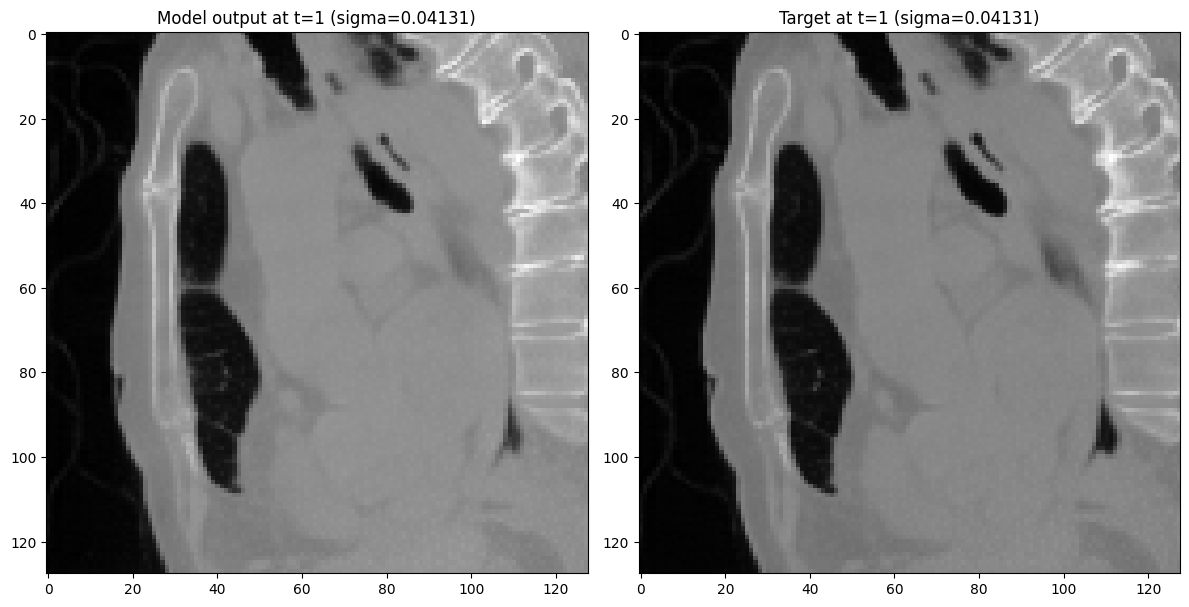

In [ ]:
first_model_output = model_outputs[0]
first_target = targets[0]
model.decode_first_stage(first_model_output)[64]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(model.decode_first_stage(first_model_output)[64, 0].cpu().numpy(), cmap="gray")
axs[0].set_title(f"Model output at t={ts[0]} (sigma={sigmas[0]:.5f})")
axs[1].imshow(model.decode_first_stage(first_target)[64, 0].cpu().numpy(), cmap="gray")
axs[1].set_title(f"Target at t={ts[]} (sigma={sigmas[0]:.5f})")
plt.tight_layout()
plt.show()

In [61]:
sigmas[0]

tensor(0.0413)

In [1]:
sigmas

NameError: name 'sigmas' is not defined

In [29]:
import torch
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer
import numpy as np

In [15]:
model, preprocess = create_model_from_pretrained('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
tokenizer = get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')

INFO:root:Loaded hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224 model config.
INFO:root:Loading pretrained hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224 weights (/home/maximilian.schulze/.cache/huggingface/hub/models--microsoft--BiomedCLIP-PubMedBERT_256-vit_base_patch16_224/snapshots/9f341de24bfb00180f1b847274256e9b65a3a32e/open_clip_pytorch_model.bin).


In [ ]:
test_element["xrays"][0].permute(1, 2, 0).numpy()

torch.Size([1, 128, 128])

In [26]:
test_element["xrays"][0]

tensor([[[-0.0020,  0.0706,  0.1255,  ..., -1.0000, -1.0000, -1.0000],
         [-0.0118,  0.0569,  0.1235,  ..., -1.0000, -1.0000, -1.0000],
         [-0.0137,  0.0471,  0.1098,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-0.9824, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9824, -0.9824, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9804, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000]]])

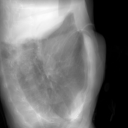

In [32]:
Image.fromarray(((test_element["xrays"][0].squeeze(0).numpy() + 1) / 2 * 255).astype(np.uint8), mode="L")

In [43]:
model = model.to("cuda")

In [48]:
xray = Image.fromarray(((test_element["xrays"][0].squeeze(0).numpy() + 1) / 2 * 255).astype(np.uint8), mode="L").convert("RGB")
xrays = preprocess(xray).unsqueeze(0).to("cuda")
context_length = 256
texts = tokenizer([test_element["raw_text"]], context_length=context_length).to("cuda")

In [49]:
image_features, text_features, logit_scale = model(xrays, texts)

In [50]:
torch.nn.functional.cosine_similarity(image_features, text_features).item()

0.1951921284198761

In [47]:
torch.nn.functional.cosine_similarity(image_features, text_features).item()

0.19712388515472412

In [51]:
other_item = data.validation_dataset[1]

In [55]:
xray = Image.fromarray(((other_item["xrays"][1].squeeze(0).numpy() + 1) / 2 * 255).astype(np.uint8), mode="L").convert("RGB")
xrays = preprocess(xray).unsqueeze(0).to("cuda")
context_length = 256
texts = tokenizer([other_item["raw_text"]], context_length=context_length).to("cuda")

In [56]:
image_features2, text_features2, logit_scale2 = model(xrays, texts)

In [57]:
torch.nn.functional.cosine_similarity(image_features2, text_features).item()

0.17939493060112

In [78]:
distances = []
text_distances = []
best_average_image_similarity = 0
best_average_text_similarity = 0
best_average_image_similarity_index = 0
best_average_text_similarity_index = 0
all_image_features = []
all_text_features = []

base_xrays = None
base_text = None

base_path = Path("/home/maximilian.schulze/datasets/radchest/preprocessed-biomedclip/validation")
base_path.mkdir(parents=True, exist_ok=True)
with torch.no_grad():
    for index in tqdm(range(len(data.validation_dataset))):
        item = data.validation_dataset[index]
        xray0 = Image.fromarray(((item["xrays"][0].squeeze(0).numpy() + 1) / 2 * 255).astype(np.uint8), mode="L").convert("RGB")
        xray1 = Image.fromarray(((item["xrays"][1].squeeze(0).numpy() + 1) / 2 * 255).astype(np.uint8), mode="L").convert("RGB")
        xrays = torch.stack([preprocess(xray0), preprocess(xray1)], dim=0).to("cuda")
        context_length = 256
        texts = tokenizer([item["raw_text"]], context_length=context_length).to("cuda")

        image_features_other, text_features_other, logit_scale_other = model(xrays, texts)
        image_features_other = image_features_other * logit_scale_other
        all_image_features.append(image_features_other.cpu())
        all_text_features.append(text_features_other.cpu())
        (base_path / item["scan_id"]).mkdir(parents=True, exist_ok=True)
        torch.save(image_features_other.cpu(), base_path / item["scan_id"] / "xray_image_features.pt")
        torch.save(text_features_other.cpu(), base_path / item["scan_id"] / "text_features.pt")
        if base_xrays is None:
            base_xrays = image_features_other
            base_text = text_features_other
            print("Base image features:", base_xrays.shape)
            print("Base text features:", base_text.shape)
        else:
            this_distances = []
            for i in range(2):
                for j in range(2):
                    this_distances.append(torch.nn.functional.cosine_similarity(base_xrays[i].unsqueeze(0), image_features_other[j]).item())
            distances.append(this_distances)
            text_distances.append(torch.nn.functional.cosine_similarity(base_text, text_features_other[0]).item())
            average_image_similarity = torch.mean(torch.tensor(this_distances)).item()
            average_text_similarity = torch.mean(torch.tensor(text_distances)).item()
            if average_image_similarity > best_average_image_similarity:
                best_average_image_similarity = average_image_similarity
                best_average_image_similarity_index = index
                print("Best image similarity:", best_average_image_similarity, "at index", index)
            if average_text_similarity > best_average_text_similarity:
                best_average_text_similarity = average_text_similarity
                best_average_text_similarity_index = index
                print("Best text similarity:", best_average_text_similarity, "at index", index)

  0%|          | 0/363 [00:00<?, ?it/s]

Base image features: torch.Size([2, 512])
Base text features: torch.Size([1, 512])
Best image similarity: 0.7862764596939087 at index 1
Best text similarity: 0.8777710795402527 at index 1
Best image similarity: 0.8104732036590576 at index 2
Best text similarity: 0.8844617009162903 at index 3
Best image similarity: 0.8226640820503235 at index 7
Best image similarity: 0.829181969165802 at index 10
Best image similarity: 0.8330365419387817 at index 20
Best image similarity: 0.8379202485084534 at index 35
Best image similarity: 0.8395808339118958 at index 74
Best image similarity: 0.8437952995300293 at index 235
Best image similarity: 0.8438546657562256 at index 310
Best image similarity: 0.8505491018295288 at index 330


In [80]:
second_element = data.validation_dataset[330]

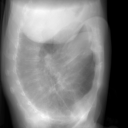

In [81]:
Image.fromarray(((second_element["xrays"][0].squeeze(0).numpy() + 1) / 2 * 255).astype(np.uint8), mode="L").convert("RGB")

In [14]:
first_element = data.validation_dataset[0]
closest_element = data.validation_dataset[330]

In [15]:
first_element = default_collate([first_element])
closest_element = default_collate([closest_element])

In [16]:
model = model.cuda().eval()

In [56]:
for key in list(first_element.keys()):
    if isinstance(first_element[key], torch.Tensor):
        first_element[key] = first_element[key].to(model.device)

for key in list(closest_element.keys()):
    if isinstance(closest_element[key], torch.Tensor):
        closest_element[key] = closest_element[key].to(model.device)

In [99]:
x_one = model.get_input(first_element)
x_one = model.encode_first_stage(x_one)
cond_el = model.conditioner(first_element)
x_closest = model.get_input(closest_element)
x_closest = model.encode_first_stage(x_closest)

/home/maximilian.schulze/generative-models/sgm/util.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


In [102]:
losses = []
ts = []
model_outputs = []
targets = []
l2s = []
weights = []
with torch.no_grad():
    for t in tqdm(range(1, 1000)):
        t  = torch.tensor([t])
        cond_copy = { k: v.clone() for k, v in cond_el.items() }
        batch_element_copy = { k: v.clone() if isinstance(v, torch.Tensor) else v for k, v in first_element.items() }
        loss, target, model_output, loss_weight = model.loss_fn.forward_t(model.model, model.denoiser, cond_copy, x_closest.clone(), first_element, t)
        ts.append(t.item())
        losses.append(loss.mean().item())
        l2s.append((model_output - x_one).pow(2).mean().item())
        targets.append(x_one)
        model_outputs.append(model_output)
        weights.append(loss_weight.mean().item())


  0%|          | 0/999 [00:00<?, ?it/s]

/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [105]:
sigmas = model.loss_fn.sigma_sampler.idx_to_sigma(torch.tensor(ts))

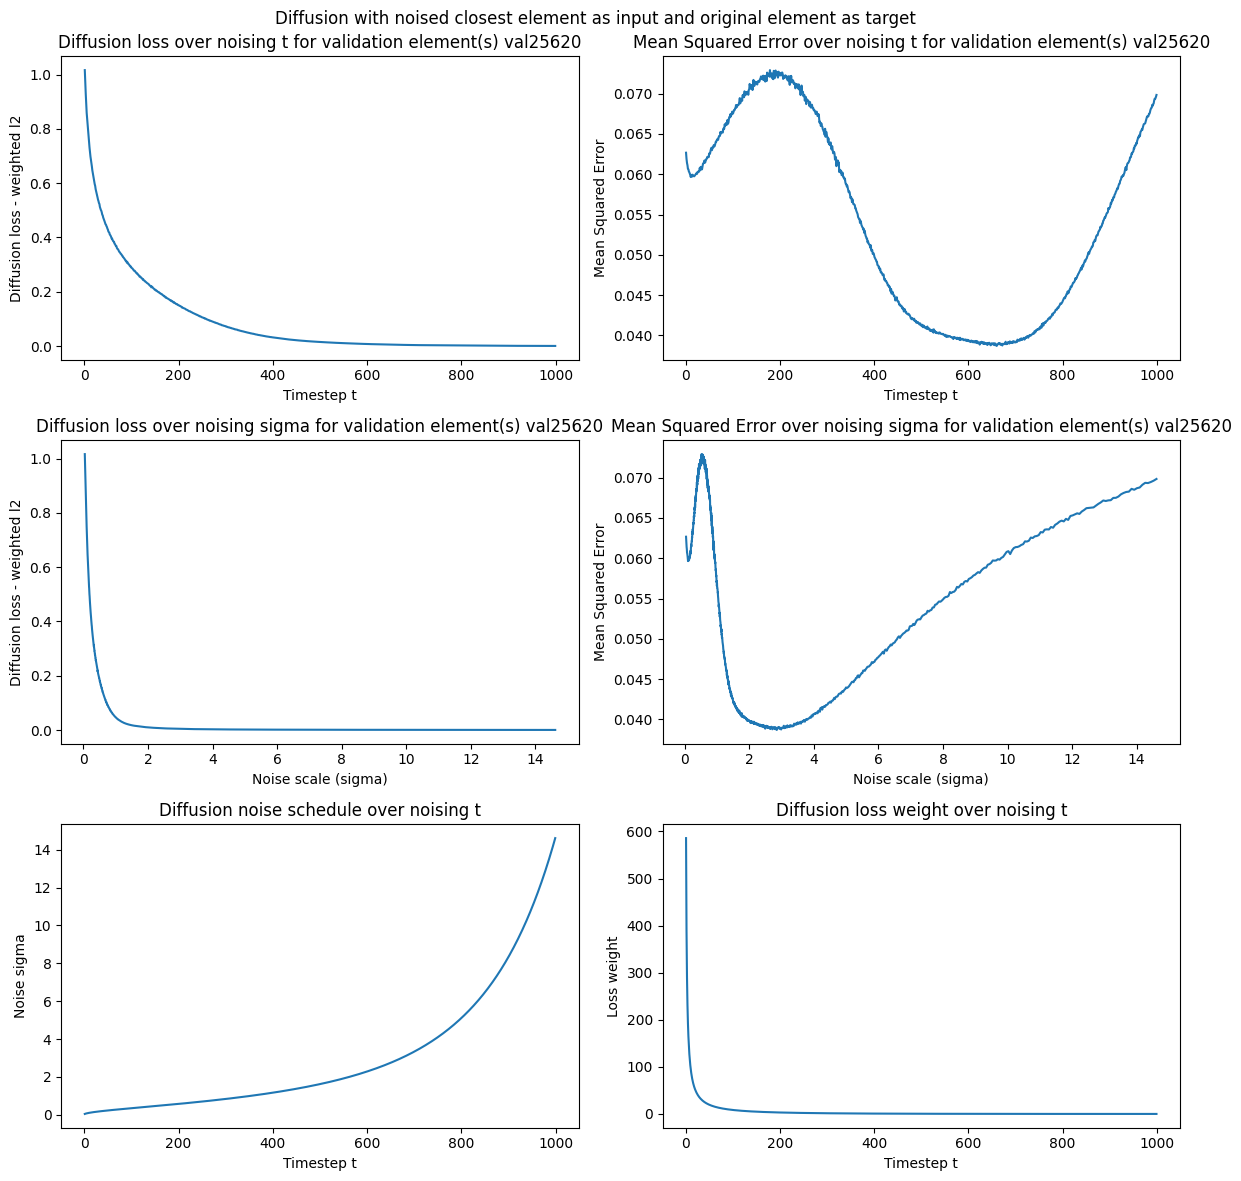

In [107]:
# All the plots above in sub-plots and a single figure
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Diffusion with noised closest element as input and original element as target")
element_names =str(first_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')
closest_element_names = str(closest_element['scan_id']).replace('\'', '').replace('[', '').replace(']', '')
# element_names = f"{element_names} - closest {closest_element_names}"
axs[0, 0].plot(ts, losses)
axs[0, 0].set_xlabel("Timestep t")
axs[0, 0].set_ylabel(f"Diffusion loss - weighted {model.loss_fn.loss_type}")
axs[0, 0].set_title(f"Diffusion loss over noising t for validation element(s) {element_names}")

axs[0, 1].plot(ts, l2s)
axs[0, 1].set_xlabel("Timestep t")
axs[0, 1].set_ylabel(f"Mean Squared Error")
axs[0, 1].set_title(f"Mean Squared Error over noising t for validation element(s) {element_names}")

axs[1, 0].plot(sigmas, losses)
axs[1, 0].set_xlabel("Noise scale (sigma)")
axs[1, 0].set_ylabel(f"Diffusion loss - weighted {model.loss_fn.loss_type}")
axs[1, 0].set_title(f"Diffusion loss over noising sigma for validation element(s) {element_names}")

axs[1, 1].plot(sigmas, l2s)
axs[1, 1].set_xlabel("Noise scale (sigma)")
axs[1, 1].set_ylabel(f"Mean Squared Error")
axs[1, 1].set_title(f"Mean Squared Error over noising sigma for validation element(s) {element_names}")

axs[2, 0].plot(ts, sigmas)
axs[2, 0].set_xlabel("Timestep t")
axs[2, 0].set_ylabel("Noise sigma")
axs[2, 0].set_title("Diffusion noise schedule over noising t")

axs[2, 1].plot(ts, weights)
axs[2, 1].set_xlabel("Timestep t")
axs[2, 1].set_ylabel("Loss weight")
axs[2, 1].set_title("Diffusion loss weight over noising t")
plt.tight_layout()
plt.show()


In [19]:
cond = model.conditioner(first_element)

/home/maximilian.schulze/generative-models/sgm/util.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


In [18]:
output = model.batch_sample_metrics(
    first_element
)

/home/maximilian.schulze/generative-models/sgm/util.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(
Sampling:   0%|          | 0/31 [00:00<?, ?it/s]/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [20]:
output["mse_latents"].mean()

tensor(0.0650, device='cuda:0')

In [22]:
torch.cuda.empty_cache()

In [65]:
from einops import repeat

with torch.no_grad():
    conditioner_input_keys = [e.input_key for e in model.conditioner.embedders]
    ucg_keys = conditioner_input_keys
    x = first_element[model.input_key]
    x = x.to(model.device)
    N = x.shape[0]
    x = x.flatten(0, 1)
    c, uc = model.conditioner.get_unconditional_conditioning(
        first_element,
        force_uc_zero_embeddings=ucg_keys
        if len(model.conditioner.embedders) > 0
        else [],
    )
    sampling_kwargs = {}
    sampling_kwargs["image_only_indicator"] = repeat(first_element["image_only_indicator"], "b ... -> (2 b) ...")
    video_inputs = x.reshape(N, -1, *x.shape[1:])
    z_first_stage = model.encode_first_stage(x)
    for k in c:
        if isinstance(c[k], torch.Tensor) and (k != "vector"):
            c[k], uc[k] = map(lambda y: y[k].to(model.device), (c, uc))
    with model.ema_scope("Plotting"):
        randn = torch.randn(z_first_stage.shape[0], *z_first_stage.shape[1:], device=model.device)
        denoiser = lambda input, sigma, c: model.denoiser(
            model.model, input, sigma, c, **sampling_kwargs
        )
        sample_latents = model.sampler(denoiser, randn, c, uc=uc)
    samples = model.decode_first_stage(sample_latents.to(dtype=model.first_stage_model.decoder.conv_in.weight.dtype))

In [58]:
samples.shape

torch.Size([128, 1, 128, 128])

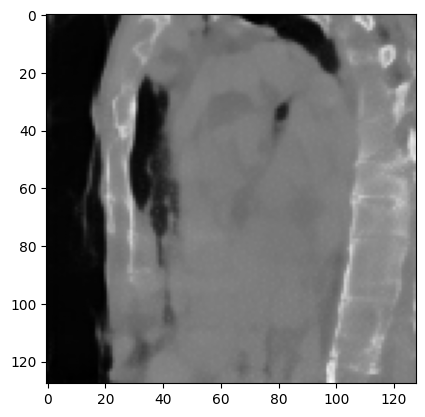

In [59]:
plt.imshow(samples[67, 0].cpu().numpy(), cmap="gray")

In [55]:
from einops import repeat

with torch.no_grad():
    conditioner_input_keys = [e.input_key for e in model.conditioner.embedders]
    ucg_keys = conditioner_input_keys
    x = first_element[model.input_key]
    x = x.to(model.device)
    N = x.shape[0]
    x = x.flatten(0, 1)
    c, uc = model.conditioner.get_unconditional_conditioning(
        first_element,
        force_uc_zero_embeddings=ucg_keys
        if len(model.conditioner.embedders) > 0
        else [],
    )
    sampling_kwargs = {}
    sampling_kwargs["image_only_indicator"] = repeat(first_element["image_only_indicator"], "b ... -> (2 b) ...")
    video_inputs = x.reshape(N, -1, *x.shape[1:])
    z_first_stage = model.encode_first_stage(x)
    for k in c:
        if isinstance(c[k], torch.Tensor) and (k != "vector"):
            c[k], uc[k] = map(lambda y: y[k].to(model.device), (c, uc))
    with model.ema_scope("Plotting"):
        randn = torch.randn(z_first_stage.shape[0], *z_first_stage.shape[1:], device=model.device)
        denoiser = lambda input, sigma, c: model.denoiser(
            model.model, input, sigma, c, **sampling_kwargs
        )
        sample_latents = model.sampler(denoiser, randn, c, uc=uc)
    samples = model.decode_first_stage(sample_latents.to(dtype=model.first_stage_model.decoder.conv_in.weight.dtype))

/home/maximilian.schulze/generative-models/sgm/util.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(


RuntimeError: Input type (float) and bias type (c10::Half) should be the same

In [68]:
from einops import repeat

from sgm.util import append_dims

with torch.no_grad():
    conditioner_input_keys = [e.input_key for e in model.conditioner.embedders]
    ucg_keys = conditioner_input_keys
    x = first_element[model.input_key]
    x_closest = closest_element[model.input_key]
    x = x.to(model.device)
    x_closest = x_closest.to(model.device)
    N = x.shape[0]
    x = x.flatten(0, 1)
    x_closest = x_closest.flatten(0, 1)
    c, uc = model.conditioner.get_unconditional_conditioning(
        first_element,
        force_uc_zero_embeddings=ucg_keys
        if len(model.conditioner.embedders) > 0
        else [],
    )
    sampling_kwargs = {}
    sampling_kwargs["image_only_indicator"] = repeat(first_element["image_only_indicator"], "b ... -> (2 b) ...")
    video_inputs = x.reshape(N, -1, *x.shape[1:])
    z_first_stage = model.encode_first_stage(x)
    z_first_stage_closest = model.encode_first_stage(x_closest)

    for k in c:
        if isinstance(c[k], torch.Tensor) and (k != "vector"):
            c[k], uc[k] = map(lambda y: y[k].to(model.device), (c, uc))
    with model.ema_scope("Plotting"):
        noise = torch.randn(z_first_stage.shape[0], *z_first_stage.shape[1:], device=model.device)
        sigmas = model.sampler.discretization(model.sampler.num_steps)
        sigma = sigmas[0].to(z_first_stage_closest.device)
        noised_z = z_first_stage_closest + noise * append_dims(sigma, z_first_stage_closest.ndim)
        noised_z = noised_z / torch.sqrt(
                    1.0 + sigmas[0] ** 2.0
                )  # Note: hardcoded to DDPM-like scaling. need to generalize later.
        denoiser = lambda input, sigma, c: model.denoiser(
            model.model, input, sigma, c, **sampling_kwargs
        )
        sample_latents_from_closest = model.sampler(denoiser, noised_z, c, uc=uc)
    samples_from_closest = model.decode_first_stage(sample_latents_from_closest.to(dtype=model.first_stage_model.decoder.conv_in.weight.dtype))

/home/maximilian.schulze/generative-models/sgm/util.py:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(
Sampling:   0%|          | 0/31 [00:00<?, ?it/s]/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/home/maximilian.schulze/miniforge3/envs/stablediffusion/lib/python3.12/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


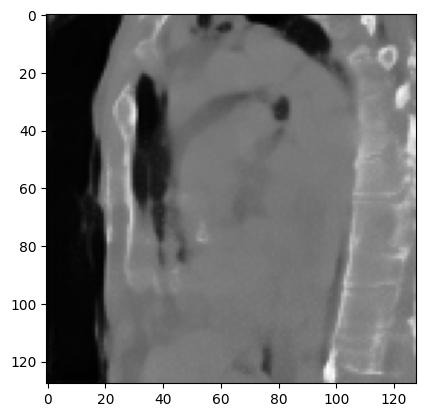

In [69]:
plt.imshow(samples_from_closest[67, 0].cpu().numpy(), cmap="gray")

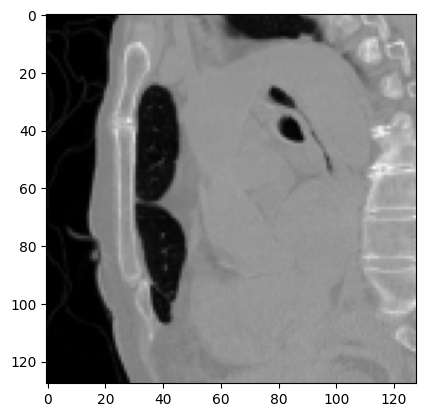

In [70]:
plt.imshow(x[67, 0].cpu().numpy(), cmap="gray")

In [ ]:
def create_plot(original: torch.Tensor, closest_neighbor: torch.Tensor, random_sampled: torch.Tensor, img2img_sampled: torch.Tensor, xrays_original: torch.Tensor, xrays_closest: torch.Tensor, slice_index=67):
    fig, axs = plt.subplots(2, 6, figsize=(30, 12))
    fig.suptitle(f"Diffusion with noised closest element as input and original element as target")
    axs[0, 0].imshow(img2img_sampled[slice_index, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[0, 0].set_title(f"Sampled img2img from closest element")
    axs[0, 1].imshow(random_sampled[slice_index, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[0, 1].set_title("Sampled from random noise")
    axs[0, 2].imshow(x[slice_index, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[0, 2].set_title(f"Original element")
    axs[0, 3].imshow(closest_neighbor[slice_index, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[0, 3].set_title(f"Closest element")

    # Plot differences to original element
    axs[1, 0].imshow((img2img_sampled[slice_index, 0] - original[slice_index, 0]).cpu().numpy(), cmap="berlin", vmin=-2, vmax=2)
    axs[1, 0].set_title(f"Diff to original element")
    axs[1, 1].imshow((random_sampled[slice_index, 0] - original[slice_index, 0]).cpu().numpy(), cmap="berlin", vmin=-2, vmax=2)
    axs[1, 1].set_title(f"Diff to original element")
    axs[1, 2].imshow((random_sampled[slice_index, 0] - img2img_sampled[slice_index, 0]).cpu().numpy(), cmap="berlin", vmin=-2, vmax=2)
    axs[1, 2].set_title(f"Diff random sampled to img2img (rand - img2img)")
    axs[1, 3].imshow((original[slice_index, 0] - closest_neighbor[slice_index, 0]).cpu().numpy(), cmap="berlin", vmin=-2, vmax=2)
    axs[1, 3].set_title(f"Diff original to closest element (original - closest)")

    # Plot x-rays
    axs[0, 4].imshow(xrays_original[0, 0, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[0, 4].set_title(f"Original element x-ray 0")
    axs[0, 5].imshow(xrays_original[0, 1, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[0, 5].set_title(f"Original element x-ray 1")
    axs[1, 4].imshow(xrays_closest[0, 0, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[1, 4].set_title(f"Sampled element x-ray 0")
    axs[1, 5].imshow(xrays_closest[0, 1, 0].cpu().numpy(), cmap="gray", vmin=-1, vmax=1)
    axs[1, 5].set_title(f"Closest element x-ray 1")
    fig.tight_layout()
    return fig

In [60]:
x.shape

torch.Size([128, 1, 128, 128])

In [66]:
from einops import rearrange
from sgm.models.diffusion import compute_3d_psnr_ssim

# psnr_closest, ssim_closest = compute_3d_psnr_ssim(rearrange(x, "d c w h -> 1 c w h d"), rearrange(samples_from_closest, "d c w h -> 1 c w h d"), (-1.0, 1.0))
psnr_randn, ssim_randn = compute_3d_psnr_ssim(rearrange(x, "d c w h -> 1 c w h d"), rearrange(samples, "d c w h -> 1 c w h d"), (-1.0, 1.0))

In [67]:
# print("PSNR img2img from closest element:", psnr_ssim_from_closest[0].item())
print("PSNR from random noise:", psnr_randn.item())
# print("PSNR difference random - img2img:", (psnr_ssim_randn[0] - psnr_ssim_from_closest[0]).item())

# print("SSIM img2img from closest element:", psnr_ssim_from_closest[1].item())
print("SSIM from random noise:", ssim_randn.item())
# print("SSIM difference random - img2img:", (psnr_ssim_randn[1] - psnr_ssim_from_closest[1]).item())

PSNR from random noise: 8.708242416381836
SSIM from random noise: 0.20110297203063965


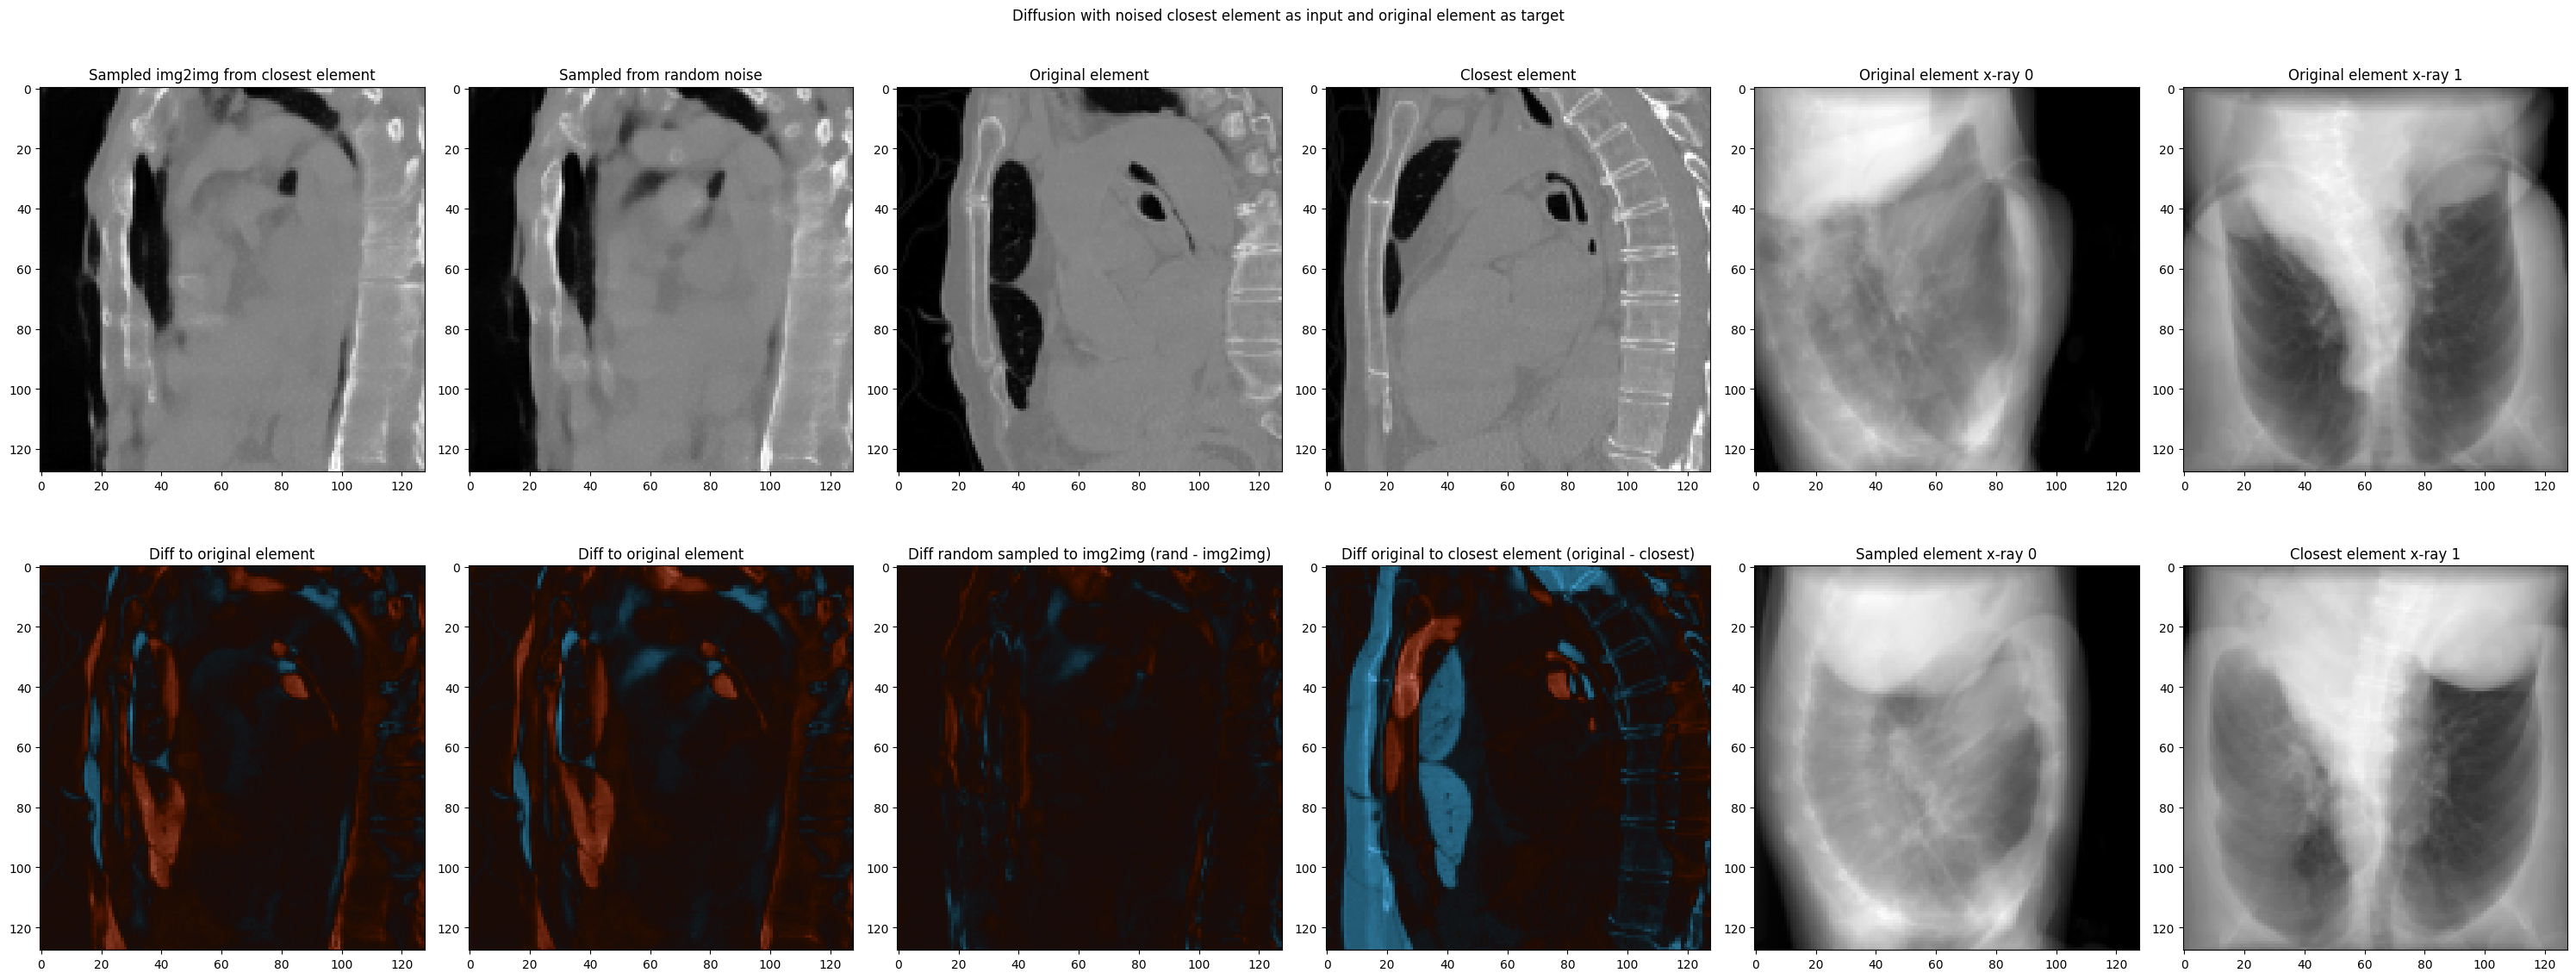

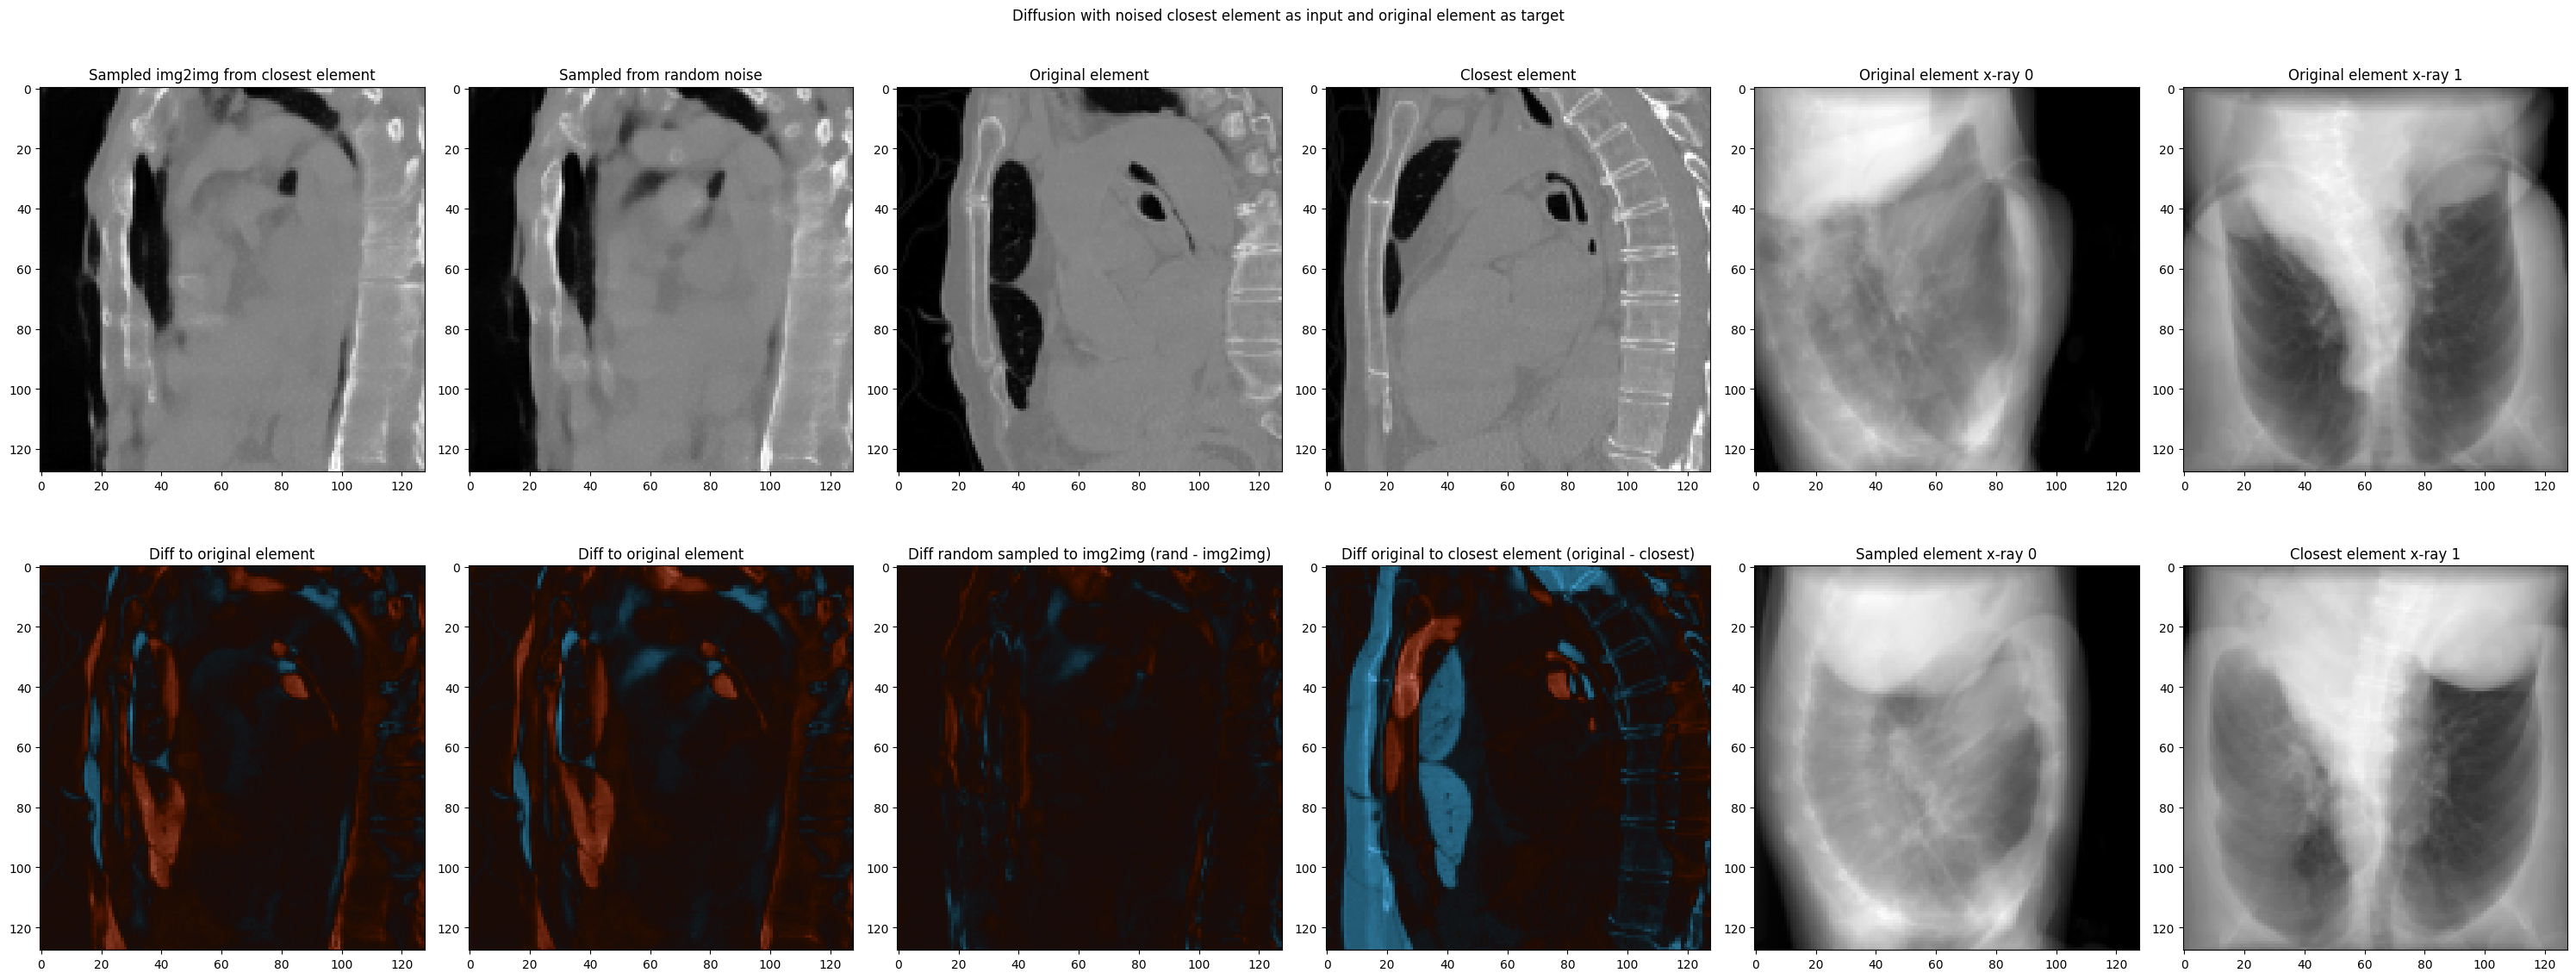

In [85]:
create_plot(x, x_closest, samples, samples_from_closest, first_element["xrays"].cpu(), closest_element["xrays"].cpu(), slice_index=67)

In [99]:
comparison_element = None
psnrs = [0.0]
ssims = [0.0]
for el in tqdm(data.validation_dataset):
    if comparison_element is None:
        comparison_element = el
    else:
        psnr_3d, ssim_3d = compute_3d_psnr_ssim(rearrange(el["ct"], "c w h d -> 1 c w h d"), rearrange(comparison_element["ct"], "c w h d -> 1 c w h d"), (-1.0, 1.0))
        psnrs.append(psnr_3d.mean().item())
        ssims.append(ssim_3d.mean().item())

  0%|          | 0/363 [00:00<?, ?it/s]

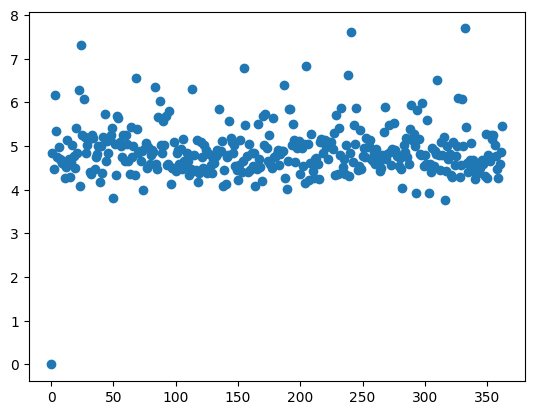

In [101]:
plt.scatter(range(len(psnrs)), psnrs)

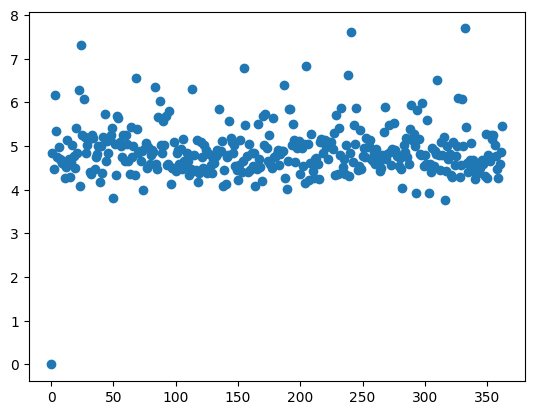

In [102]:
plt.scatter(range(len(ssims)), psnrs)

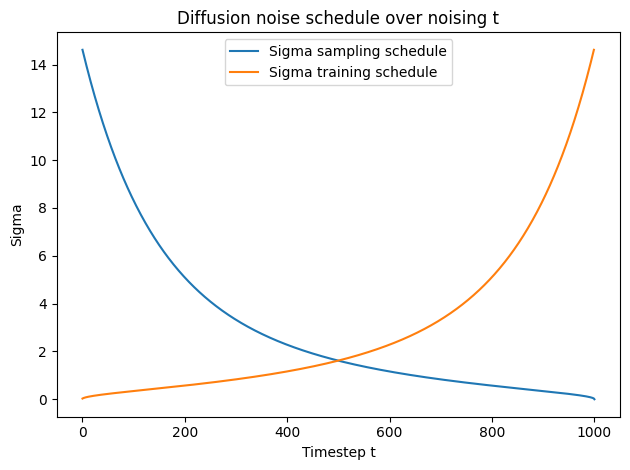

In [54]:
plt.plot(range(1001), model.sampler.discretization(1000), label="Sigma sampling schedule")
plt.plot(range(1000), model.loss_fn.sigma_sampler.idx_to_sigma(torch.arange(1000)), label="Sigma training schedule")
training_sigmas = model.loss_fn.sigma_sampler.idx_to_sigma(torch.arange(1000))
training_sigmas_accumulated_sum = torch.cumsum(training_sigmas, dim=0)
# plt.plot(torch.arange(1000), training_sigmas_accumulated_sum.flip(0), label="Sigma training schedule accumulated sum")
plt.xlabel("Timestep t")
plt.ylabel("Sigma")
plt.title("Diffusion noise schedule over noising t")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
original_sampler_discretization = model.sampler.discretization

In [51]:
from sgm.modules.diffusionmodules.discretizer import LegacyDDPMDiscretization

In [52]:
model.sampler.discretization = LegacyDDPMDiscretization()

In [ ]:
model.loss_fn.sigma_sampler.sigmas

tensor([ 0.0292,  0.0413,  0.0507,  0.0586,  0.0656,  0.0720,  0.0779,  0.0834,
         0.0886,  0.0936,  0.0983,  0.1028,  0.1072,  0.1114,  0.1155,  0.1195,
         0.1234,  0.1271,  0.1308,  0.1345,  0.1380,  0.1415,  0.1449,  0.1482,
         0.1515,  0.1548,  0.1580,  0.1611,  0.1642,  0.1673,  0.1704,  0.1734,
         0.1763,  0.1793,  0.1822,  0.1850,  0.1879,  0.1907,  0.1935,  0.1963,
         0.1991,  0.2018,  0.2045,  0.2072,  0.2099,  0.2125,  0.2152,  0.2178,
         0.2204,  0.2230,  0.2256,  0.2281,  0.2307,  0.2332,  0.2358,  0.2383,
         0.2408,  0.2433,  0.2458,  0.2482,  0.2507,  0.2531,  0.2556,  0.2580,
         0.2604,  0.2628,  0.2653,  0.2677,  0.2700,  0.2724,  0.2748,  0.2772,
         0.2795,  0.2819,  0.2843,  0.2866,  0.2889,  0.2913,  0.2936,  0.2959,
         0.2983,  0.3006,  0.3029,  0.3052,  0.3075,  0.3098,  0.3121,  0.3144,
         0.3167,  0.3190,  0.3213,  0.3235,  0.3258,  0.3281,  0.3304,  0.3326,
         0.3349,  0.3372,  0.3394,  0.34

In [ ]:
model.sampler.discretization = model.loss_fn.sigma_sampler